<a href="https://colab.research.google.com/github/arnavnerkar/Quant-Wing-2023/blob/main/Quant_Wing_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPM Model

In [1]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
nifty_data = yf.download("^NSEI", period="1y")

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_hist = yf.download("NESTLEIND.NS", period="1y")
stock_label = "NESTLEIND"

[*********************100%%**********************]  1 of 1 completed


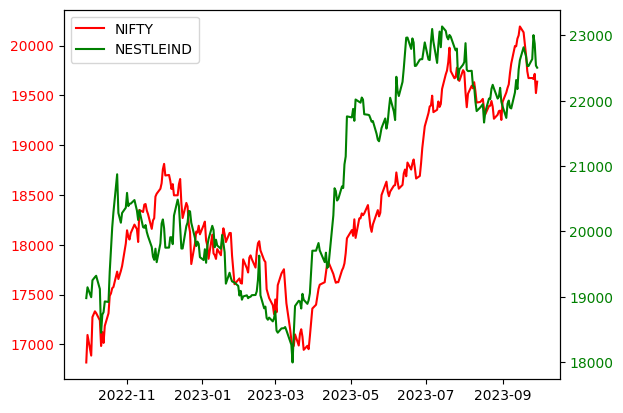

In [6]:
fig, ax = plt.subplots()

# Plot linear sequence, and set tick labels to the same color
l1 = ax.plot(nifty_data['Close'], color='red', label="NIFTY")
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
l2 = ax2.plot(stock_hist['Close'], color='green', label=stock_label)
ax2.tick_params(axis='y', labelcolor='green')

lines = l1 + l2
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc=0)

plt.show()

In [7]:
# Finding cumulative returns

nifty_data["Cumulative Return"] = nifty_data['Close']/nifty_data['Close'].iloc[0]
stock_hist["Cumulative Return"] = stock_hist['Close']/stock_hist['Close'].iloc[0]

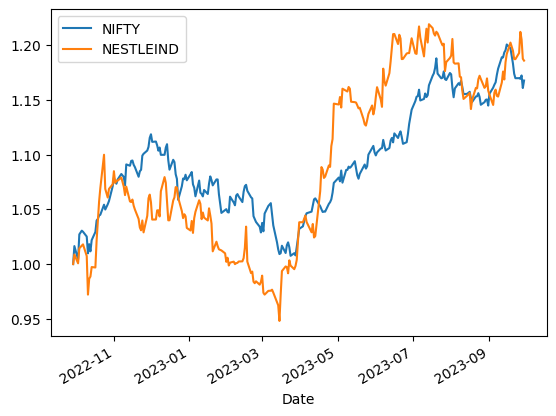

In [8]:
nifty_data['Cumulative Return'].plot(label = 'NIFTY')
stock_hist['Cumulative Return'].plot(label = stock_label)
plt.legend()

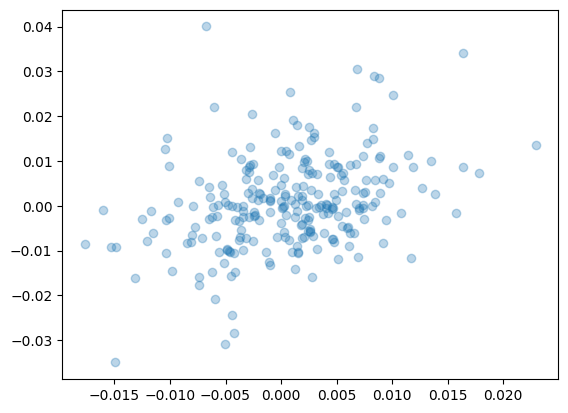

In [9]:
# Find daily return
nifty_data['Daily Return'] = nifty_data['Close'].pct_change(1)
stock_hist['Daily Return'] = stock_hist['Close'].pct_change(1)
plt.scatter(nifty_data['Daily Return'],stock_hist['Daily Return'], alpha=0.3)

In [10]:
LR = stats.linregress(stock_hist['Daily Return'].iloc[1:],nifty_data['Daily Return'].iloc[1:])

In [11]:
beta,alpha,r_val,p_val,std_err = LR

In [12]:
alpha

0.0004812877377801622

In [13]:
beta

0.2226843130423958

In [14]:
rf = 6
rm = stock_hist['Daily Return'].mean() * 252 * 100
rm

18.65861780992981

In [15]:
er = rf + beta * (rm - rf)
er

8.818875611070457